# Homework 5: Hypothesis Testing

This assignment is due Thursday, October 12 at 11:59PM. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Reading: Chapter [10](https://www.inferentialthinking.com/chapters/10/testing-hypotheses.html).

Run the cell below to prepare the notebook and the tests. **Passing the automatic tests does not guarantee full credit on any question.** The tests are provided to help catch some common errors, but it is *your* responsibility to answer the questions correctly.

In [5]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw05.ok')
_ = ok.auth(inline=True)

Assignment: Homework 5: Hypothesis Testing
OK, version v1.12.5


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: A1yr8FY9FfHa32N5AWJMoTtrw1RUAO
Successfully logged in as kcs1992@berkeley.edu


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [ ]:
_ = ok.submit()

<IPython.core.display.Javascript object>

## 1. Catching Cheaters


Suppose you are a casino owner, and your casino runs a very simple game of chance.  The dealer flips a coin.  The customer wins \$9 from the casino if it comes up heads and loses \$10 if it comes up tails.

<div class="hide">\pagebreak</div>
**Question 1.** Assuming no one is cheating and the coin is fair, if a customer plays twice, what is the chance they make money?

In [4]:
p_winning_after_two_flips = 1/4

In [3]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



A certain customer plays the game 20 times and wins 13 of the bets.  You suspect that the customer is cheating!  That is, you think that their chance of winning is higher than the normal chance of winning.

You decide to test your hunch using the outcomes of the 20 games you observed.

<div class="hide">\pagebreak</div>
#### Question 2
Define the null hypothesis and alternative hypothesis for this investigation.

**Null hypothesis:** the chance of winning is 50% of winning.

**Alternative hypothesis:** the chance of winning is higher than 50% of winning. 

<div class="hide">\pagebreak</div>

**Question 3.** Given the outcome of 20 games, which of the following test statistics would be a reasonable choice for this hypothesis test?

1. Whether there is at least one win.
1. Whether there is at least one loss.
1. The number of wins.
1. The number of wins minus the number of losses.
1. The total variation distance between the probability distribution of a fair coin and the observed distribution of heads and tails.
1. The total amount of money that the customer won.

Assign `reasonable_test_statistics` to a **list** of numbers corresponding to these test statistics.

In [56]:
reasonable_test_statistics = list(make_array(3,4,6))
reasonable_test_statistics

[3, 4, 6]

In [31]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>
**Question 4.** Write a function called `simulate`.  It should take no arguments.  It should return the number of wins in 20 games simulated under the assumption that the result of each game is sampled from a fair coin.

In [6]:
def simulate():
    n = 20
    result = make_array('Win', 'Lose')
    sample = np.random.choice(result, n)
    win = np.count_nonzero(sample == 'Win')
    return win
simulate()

11

In [14]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Using a 10,000 trial simulation, generate a histogram of the empirical distribution of the number of wins in 20 games.

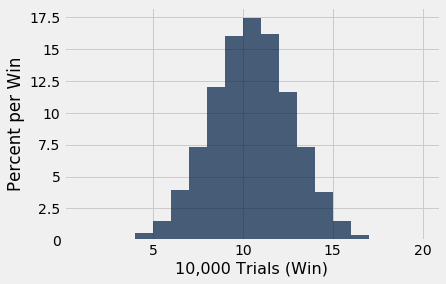

In [7]:
n = 10000

sampled_stats = make_array()
bet = make_array('Win', 'Lose')


for i in np.arange(n):
    new_sample = np.random.choice(bet, 20)
    win = np.count_nonzero(new_sample == 'Win')
    sampled_stats = np.append(sampled_stats, win)
    
results = Table().with_column('10,000 Trials', sampled_stats)
results.hist( '10,000 Trials', bins = np.arange(1,21,1), unit = 'Win')



<div class="hide">\pagebreak</div>

**Question 6.** Compute an empirical P-value for this test.

In [5]:

p_value = np.count_nonzero(sampled_stats >= 13)/n
p_value

0.1258

In [35]:
_ = ok.grade('q1_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>
#### Question 7
Suppose you use a P-value cutoff of 1%, according to the arbitrary conventions of hypothesis testing.  What do you conclude?

*null hypothesis is correct*

<div class="hide">\pagebreak</div>
#### Question 8
Is `p_value` the probability that the customer cheated, or the probability that the customer didn't cheat, or neither?

*neither since we got the p_value from the experiment and assumed that null hypothesis is true*

<div class="hide">\pagebreak</div>
#### Question 9
Is 1% (the P-value cutoff) the probability that the customer cheated, or the probability that the customer didn't cheat, or neither?

*the probability that the customer cheated*

<div class="hide">\pagebreak</div>
**Question 10**

Suppose you run this test for 400 different customers after observing each customer play 20 games.  When you reject the null hypothesis for a customer, you accuse that customer of cheating.  If no customer were actually cheating, how many would you expect to accuse, on average (if any)?  Assume a 1% P-value cutoff. Explain your answer.

*Since we're using 1% p_value cutoff, 40 customers are expected to be accused on average.*

## 2. Landing a Spacecraft


(Note: This problem describes something that's close to [a real story with a very exciting video](http://www.space.com/29119-spacex-reusable-rocket-landing-crash-video.html), but the details have been changed somewhat.)

SpaceY, a company that builds and tests spacecraft, is testing a new reusable launch system.  Most spacecraft use a "first stage" rocket that propels a smaller payload craft away from Earth, then falls back to the ground and crashes.  SpaceY's new system is designed to land safely at a landing pad at a certain location, ready for later reuse.  If it doesn't land in the right location, it crashes, and the (very expensive) vehicle is destroyed.

SpaceY has tested this system over 1000 times.  Ordinarily, the vehicle doesn't land exactly on the landing pad.  For example, a gust of wind might move it by a few meters just before it lands.  It's reasonable to think of these small errors as random.  That is, the landing locations are drawn from some distribution over locations on the surface of Earth, centered around the landing pad.

Run the next cell to see a plot of those locations.

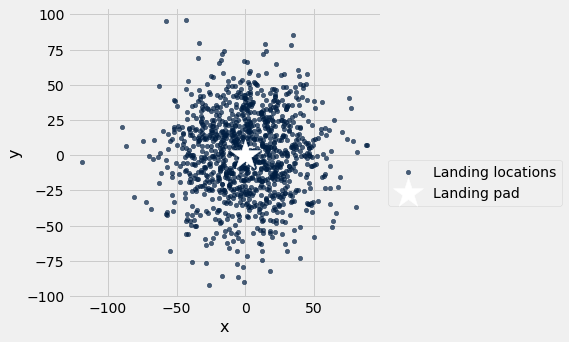

In [16]:
ordinary_landing_spots = Table.read_table("ordinary_landing_spots.csv")
ordinary_landing_spots.scatter("x", label="Landing locations")
plots.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plots.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

During one test, the vehicle lands far away from the landing pad and crashes.  SpaceY investigators suspect there was a problem unique to this landing, a problem that wasn't part of the ordinary pattern of variation in landing locations.  They think a software error in the guidance system caused the craft to incorrectly attempt to land at a spot other than the landing pad.  The guidance system engineers think there was nothing out of the ordinary in this landing, and that there was no special problem with the guidance system.

Run the cell below to see a plot of the 1100 ordinary landings and the crash.

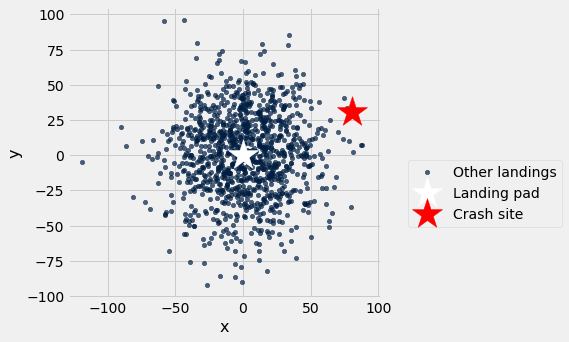

In [17]:
landing_spot = make_array(80.59, 30.91)
ordinary_landing_spots.scatter("x", label="Other landings")
plots.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plots.scatter(landing_spot.item(0), landing_spot.item(1), marker="*", c="r", s=1000, label="Crash site")
plots.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

<div class="hide">\pagebreak</div>
#### Question 1
Suppose we'd like to use hypothesis testing to shed light on this question.  We've written down an alternative hypothesis below.  What is a reasonable null hypothesis?

**Null hypothesis:** This landing was not special; its location was a draw from the other 1100 landing locations were drawn. 

**Alternative hypothesis:** This landing was special; its location was a draw from some other distribution, not the distribution from which the other 1100 landing locations were drawn.

<div class="hide">\pagebreak</div>
#### Question 2
What's a good test statistic? (*Hint:* If we want to compare landings, we might want to see how far each landing is from some *reference point*, so we can compare all landings from the same vantage point)

**Test statistic: How far away is each landing from the landing pad? ** 

<div class="hide">\pagebreak</div>
#### Question 3
Write a function called `landing_test_statistic`.  It should take two arguments: an "x" location and a "y" location (both numbers).  It should return the value of your test statistic for a landing at those coordinates.

In [28]:
def landing_test_statistic(x_coordinate, y_coordinate):
    return ((0-x_coordinate)**2+(0-y_coordinate)**2)**(1/2)





<div class="hide">\pagebreak</div>
#### Question 4
The cell below computes a P-value using your test statistic.  Describe the test procedure in words.  Is there a simulation involved?  If so, what is being simulated? If not, why not?

In [29]:
test_stat = landing_test_statistic(
    landing_spot.item(0),
    landing_spot.item(1))

null_stats = make_array()
for i in np.arange(ordinary_landing_spots.num_rows):
    null_stat = landing_test_statistic(
        ordinary_landing_spots.column('x').item(i),
        ordinary_landing_spots.column('y').item(i))
    null_stats = np.append(null_stats, null_stat)

p_value = np.count_nonzero(null_stats > test_stat) / len(null_stats)
p_value

0.012727272727272728

*Write your answer here, replacing this text.*

## 3. Testing Dice


Students in a Data Science class want to figure out whether a six-sided die is fair or not. On a fair die, each face of the die appears with chance 1/6 on each roll, regardless of the results of other rolls.  Otherwise, a die is called unfair.  We can describe a die by the probability of landing on each face.  For example, this table describes a die that is unfairly weighted toward 1:

|Face|Probability|
|--|
|1|.5|
|2|.1|
|3|.1|
|4|.1|
|5|.1|
|6|.1|

For this exercise, you can use the function `proportion_from_distribution` defined in lecture and the textbook.  We've defined it in the setup cell above.

<div class="hide">\pagebreak</div>
#### Question 1
Define a null hypothesis and an alternative hypothesis for this question.

**Null hypothesis:** each face of the die appears with chance 1/6 on each roll, regardless of the results of other rolls.

**Alternative hypothesis:** each face of the die appears not equally likely on each roll, regardless of the results of other rolls.

We decide to test the die by rolling it 5 times. The proportions of the 6 faces in these 5 rolls are stored in a table with 6 rows.  For example, here is the table we'd make if the die rolls ended up being 1, 2, 3, 3, and 5:

|Face|Proportion|
|--|
|1|.2|
|2|.2|
|3|.4|
|4|.0|
|5|.2|
|6|.0|

The function `mystery_test_statistic`, defined below, takes a single table like this as its argument and returns a number (which we will use as a test statistic).

In [23]:
# Note: We've intentionally used obscurantist function and
# variable names to avoid giving away answers.  It's rarely
# a good idea to use names like "x" in your code.

def mystery_test_statistic(sample):
    x = sum(sample.column("Face")*sample.column("Proportion"))
    y = np.mean(np.arange(1, 6+1, 1))
    return abs(x - y)





<div class="hide">\pagebreak</div>
#### Question 2
Describe in English what the test statistic is.  Is it equivalent to the total variation distance between the observed face distribution and the fair die distribution?

*According to the sample die, each face of die has a different chance of appearing, whereas the fair die has a same chance of appearing. Thus, we compare the difference between them to see if there's a difference in total variation and it turns out that it is not equivalent to the total variation distance between them.  *

The function `simulate_observations_and_test` takes as its argument a table describing the probability distribution of a die.  It simulates one set of 5 rolls of that die, then tests the null hypothesis about that die using our test statistic function above.  It returns `False` if it *rejects* the null hypothesis about the die, and `True` otherwise.

In [52]:
# The probability distribution table for a fair die:
fair_die = Table().with_columns(
        "Face", np.arange(1, 6+1),
        "Probability", [1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

def simulate_observations_and_test(actual_die):
    """Simulates die rolls from actual_die and tests the hypothesis that the die is fair.
    
    Returns True if that hypothesis is accepted, and False otherwise."""
    sample_size = 5
    p_value_cutoff = .2
    num_simulations = 250
    
    observation_set = proportions_from_distribution(actual_die, "Probability", sample_size)
    actual_statistic = mystery_test_statistic(observation_set.relabeled("Random Sample", "Proportion"))
    
    simulated_statistics = make_array()
    for _ in np.arange(num_simulations):
        one_observation_set_under_null = proportions_from_distribution(fair_die, "Probability", sample_size)
        simulated_statistic = mystery_test_statistic(one_observation_set_under_null.relabeled("Random Sample", "Proportion"))
        simulated_statistics = np.append(simulated_statistics, simulated_statistic)
    p_value = np.count_nonzero(actual_statistic < simulated_statistics) / num_simulations
    
    return p_value >= p_value_cutoff

# Calling the function to simulate a test of a fair die:
simulate_observations_and_test(fair_die)

True

<div class="hide">\pagebreak</div>
#### Question 3
By examining `simulate_observations_and_test`, compute the probability that it returns `False` when its argument is `fair_die` (which is defined above the function).  You can call the function a few times to see what it does, but **don't** perform a simulation to compute this probability.  Use your knowledge of hypothesis tests.

In [55]:
probability_of_false = .2

In [54]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>
#### Question 4
From the perspective of someone who wants to know the truth about the die, is it good or bad for the function to return `False` when its argument is `fair_die`?

*bad idea because of null hypothesis*

<div class="hide">\pagebreak</div>
#### Question 5
Verify your answer to question 3 by simulation, computing an approximate probability that `simulation_observations_and_test` returns `False`.

**Note:** This will be a little slow.  300 repetitions of the simulation should suffice to get an answer that's roughly correct and should require a minute or so of computation.

In [57]:
num_test_simulations = 300
result = make_array()
for i in np.arange(num_test_simulations):
    simulation = simulate_observations_and_test(fair_die)
    result = np.append(result, simulation)
    

np.count_nonzero(result == False)/300
    
    

# For reference, the staff solution involved 6 lines of code before this.

approximate_probability_of_false = np.count_nonzero(result == False)/300
approximate_probability_of_false

0.18666666666666668

## 4. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [58]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw05.ipynb'.
Submit... 100% complete
Submission successful for user: kcs1992@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/hw05/submissions/gJmGBr



In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")